In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import random
rcParams['figure.figsize'] = 14,6
from sklearn.linear_model import LinearRegression

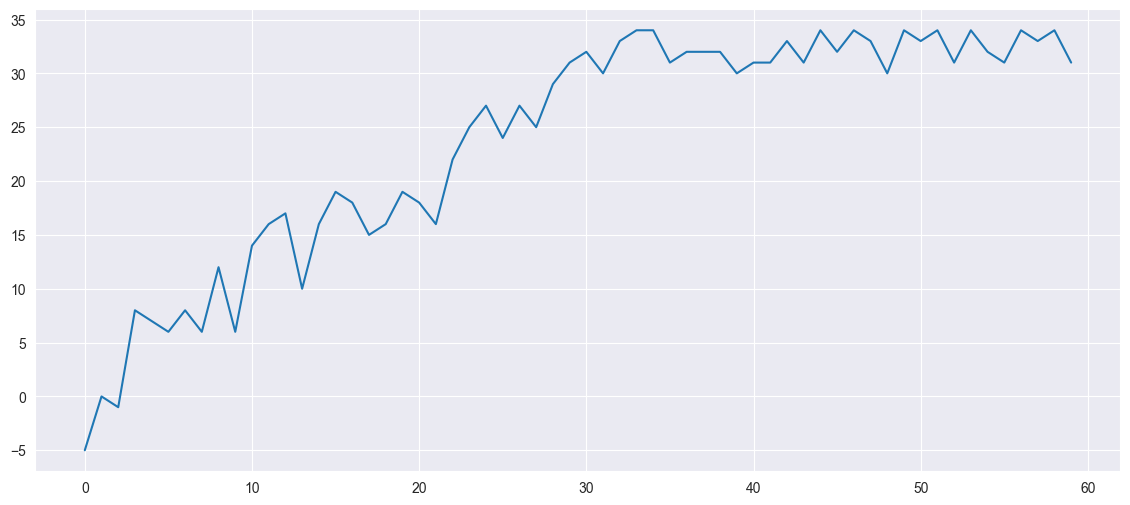

In [3]:
# Создадим какой то тренд данных с восхождением и с выходом на полочку
n_points=30
data_slopped = []
for n in range(n_points):
    data_slopped.append(n+random.randint(-5,+5))
data = np.concatenate ((np.array(data_slopped), np.random.randint(30,35, n_points)))
plt.plot(data)


In [11]:
# Стандартная библиотека sk_learn 
sk_lr = LinearRegression()

In [18]:
# Это уже функиця от меня.Идея разбить данные на сегменты, границами которых будут линии "перелома" 
# логистической прямой. Каждую новую точку сравниваем с предсказаанием по предыдцщим,
# если разность больше trashhold то сегмент заканчиваем, вносим точку в список точек перелома, и собираем набор
# данных для регрессии
def berak_trend_line(data, trashhold = 8):
    curr_y_list = []
    curr_X_list = []
    warn_points = []
    warn_index = []
    section_param = {}
    cur_pred_x = []
    treshhold = 2
    for index, point in enumerate(data):        
        cur_pred_x.clear()        
        if len(curr_y_list)<2:            
            curr_y_list.append(point)
            curr_X_list.append(index)            
        else:
            X=np.array(curr_X_list).reshape((-1, 1))
            y=np.array(curr_y_list)
            sk_lr.fit(X,y)
            cur_pred_x.append(index)
            cur_x = np.array(cur_pred_x).reshape((-1, 1))            
            if abs(point-sk_lr.predict(cur_x)) >= trashhold:               
                section_param[index] = {'x': tuple(curr_X_list), 'y':tuple(curr_y_list), 'k':sk_lr.coef_[0], 'b':sk_lr.intercept_}
                warn_points.append(point)
                warn_index.append(index)                
                curr_y_list.clear()
                curr_X_list.clear()
                curr_y_list.append(point)
                curr_X_list.append(index)
            else:
                curr_y_list.append(point)
                curr_X_list.append(index)
    X=np.array(curr_X_list).reshape((-1, 1))
    y=np.array(curr_y_list)
    sk_lr.fit(X,y)
    section_param[index] = {'x': tuple(curr_X_list), 'y':tuple(curr_y_list), 'k':sk_lr.coef_[0], 'b':sk_lr.intercept_}
    return warn_index, warn_points, section_param

In [19]:
warn_index, warn_points, section_param = berak_trend_line(data)

{'x': (0, 1), 'y': (0, 3), 'k': 2.9999999999999996, 'b': 2.220446049250313e-16}
{'x': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39), 'y': (-3, 2, -1, 6, 4, 9, 7, 11, 8, 13, 10, 14, 18, 20, 15, 18, 14, 24, 24, 25, 19, 23, 22, 22, 31, 28, 26, 29, 32, 30, 32, 33, 34, 30, 32, 32, 34, 32), 'k': 0.9378487799540431, 'b': 0.7477842214684323}
{'x': (40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59), 'y': (30, 33, 34, 34, 33, 34, 33, 34, 30, 30, 30, 32, 30, 30, 34, 34, 31, 31, 31, 30), 'k': -0.1067669172932331, 'b': 37.18496240601504}


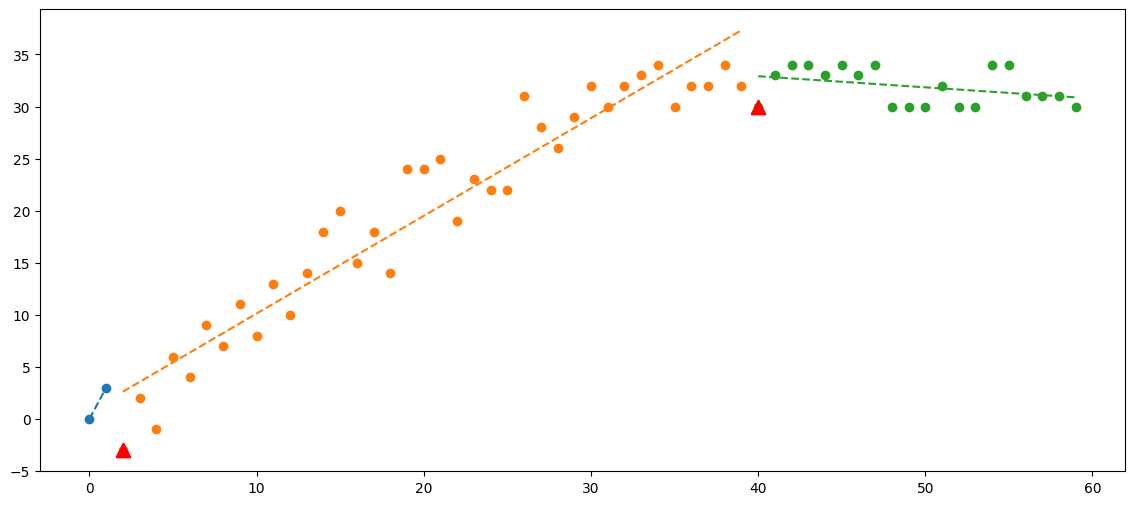

In [27]:
#Визуализация
for k,v in section_param.items():
    print(v)
    plt.scatter(x=v['x'] , y=v['y'])
    x = np.linspace(v['x'][0], v['x'][-1], 10)
    # Построение прямой
    y=v['k']*x+v['b']
    plt.plot(x, y, linestyle='--')
    plt.scatter(x=warn_index , y=warn_points, c ="red", marker='^', s = 100)
    #plt.plot(np.arange(x_left,x_right), arr_mean-treshhold, linestyle='--')   
    #plt.plot(np.arange(x_left,x_right), arr_mean+treshhold, linestyle='--')
    #x_left+=len(arr)